In [1]:
# Dependencies 
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
import requests
from citipy import citipy 
import random
import time as time 

In [2]:
# Import api_key 
from config import api_key

In [3]:
#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude:
    # Latitude in degrees is -90 and +90 
    # Longitude is in the range -180 and +180 

#Creating a dataframe to display the values
cities_df = pd.DataFrame(columns =
                            ['City',
                             'Latitudes',
                             'Longitudes',
                            ])
# Holding the variables 
lat = []
lng = []
cities = []

#Creating loops to go through random lat and lng and assigning cities based on coordinates picked
    #2000 was chosen in order to ensure that atleast 500 would be unique (non-repeat) cities
for x in range(0,2000):
    lat.append(random.uniform(-90,90))
    lng.append(random.uniform(-180,180))
cities_df['Latitudes']  = lat
cities_df['Longitudes'] = lng

for index, row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitudes"],row["Longitudes"])
    cities.append(city.city_name)
cities_df['City'] = cities

#Displaying the top five 
cities_df.head()

,City,Latitudes,Longitudes
0,castro,-50.125873,-98.341072
1,puerto ayora,3.449102,-97.387967
2,vieste,41.848001,16.499310
3,new norfolk,-74.891519,131.992875
4,sinnamary,14.957307,-48.585654


In [4]:
new_cities_df = cities_df.drop_duplicates("City", keep = "first")
new_cities_df =  new_cities_df.dropna(axis= 1, how = 'all')
len(new_cities_df)

783

In [5]:
# Creating empty lists to hold the information
temp = []
wind_speed = []
cloudiness = []
humidity = []

# Calling the API from the website
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

counter = 0 

for index, row in new_cities_df.iterrows():
    try: 
        target_url = base_url + row["City"] + "&units=imperial" + "&appid="+ api_key
        time.sleep(1)
        response = requests.get(target_url).json()
        temp.append(response["main"]["temp"])
        wind_speed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
    except: 
        new_cities_df.drop(index, inplace = True)
        pass 
    
    print("We are on city number " + str(counter))
    counter = counter + 1 
    print("This is the city: " + row['City'])
    print(target_url)  

We are on city number 0
This is the city: castro
http://api.openweathermap.org/data/2.5/weather?q=castro&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 1
This is the city: puerto ayora
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 2
This is the city: vieste
http://api.openweathermap.org/data/2.5/weather?q=vieste&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 3
This is the city: new norfolk
http://api.openweathermap.org/data/2.5/weather?q=new norfolk&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 4
This is the city: sinnamary
http://api.openweathermap.org/data/2.5/weather?q=sinnamary&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 5
This is the city: illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut&units=imperial&appid=288bd40bdc806164c2b347c489a98cf

We are on city number 50
This is the city: umzimvubu
http://api.openweathermap.org/data/2.5/weather?q=umzimvubu&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 51
This is the city: preobrazheniye
http://api.openweathermap.org/data/2.5/weather?q=preobrazheniye&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 52
This is the city: athabasca
http://api.openweathermap.org/data/2.5/weather?q=athabasca&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 53
This is the city: conde
http://api.openweathermap.org/data/2.5/weather?q=conde&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 54
This is the city: hunza
http://api.openweathermap.org/data/2.5/weather?q=hunza&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 55
This is the city: hovd
http://api.openweathermap.org/data/2.5/weather?q=hovd&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city numbe

We are on city number 100
This is the city: nanortalik
http://api.openweathermap.org/data/2.5/weather?q=nanortalik&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 101
This is the city: marstal
http://api.openweathermap.org/data/2.5/weather?q=marstal&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 102
This is the city: ancud
http://api.openweathermap.org/data/2.5/weather?q=ancud&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 103
This is the city: hervey bay
http://api.openweathermap.org/data/2.5/weather?q=hervey bay&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 104
This is the city: dali
http://api.openweathermap.org/data/2.5/weather?q=dali&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 105
This is the city: port blair
http://api.openweathermap.org/data/2.5/weather?q=port blair&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city

We are on city number 150
This is the city: collipulli
http://api.openweathermap.org/data/2.5/weather?q=collipulli&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 151
This is the city: carnarvon
http://api.openweathermap.org/data/2.5/weather?q=carnarvon&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 152
This is the city: nantucket
http://api.openweathermap.org/data/2.5/weather?q=nantucket&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 153
This is the city: vaxjo
http://api.openweathermap.org/data/2.5/weather?q=vaxjo&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 154
This is the city: gogrial
http://api.openweathermap.org/data/2.5/weather?q=gogrial&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 155
This is the city: moose factory
http://api.openweathermap.org/data/2.5/weather?q=moose factory&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6


We are on city number 200
This is the city: guerrero negro
http://api.openweathermap.org/data/2.5/weather?q=guerrero negro&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 201
This is the city: kruisfontein
http://api.openweathermap.org/data/2.5/weather?q=kruisfontein&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 202
This is the city: thinadhoo
http://api.openweathermap.org/data/2.5/weather?q=thinadhoo&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 203
This is the city: labuhan
http://api.openweathermap.org/data/2.5/weather?q=labuhan&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 204
This is the city: tommot
http://api.openweathermap.org/data/2.5/weather?q=tommot&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 205
This is the city: cabo san lucas
http://api.openweathermap.org/data/2.5/weather?q=cabo san lucas&units=imperial&appid=288bd40bdc80616

We are on city number 250
This is the city: rawson
http://api.openweathermap.org/data/2.5/weather?q=rawson&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 251
This is the city: yellowknife
http://api.openweathermap.org/data/2.5/weather?q=yellowknife&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 252
This is the city: ambilobe
http://api.openweathermap.org/data/2.5/weather?q=ambilobe&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 253
This is the city: grand river south east
http://api.openweathermap.org/data/2.5/weather?q=grand river south east&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 254
This is the city: assiniboia
http://api.openweathermap.org/data/2.5/weather?q=assiniboia&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 255
This is the city: tiksi
http://api.openweathermap.org/data/2.5/weather?q=tiksi&units=imperial&appid=288bd40bdc80616

We are on city number 300
This is the city: novopavlovka
http://api.openweathermap.org/data/2.5/weather?q=novopavlovka&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 301
This is the city: chuy
http://api.openweathermap.org/data/2.5/weather?q=chuy&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 302
This is the city: pecos
http://api.openweathermap.org/data/2.5/weather?q=pecos&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 303
This is the city: chapais
http://api.openweathermap.org/data/2.5/weather?q=chapais&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 304
This is the city: victoria
http://api.openweathermap.org/data/2.5/weather?q=victoria&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 305
This is the city: maniitsoq
http://api.openweathermap.org/data/2.5/weather?q=maniitsoq&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city n

We are on city number 350
This is the city: agde
http://api.openweathermap.org/data/2.5/weather?q=agde&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 351
This is the city: dryden
http://api.openweathermap.org/data/2.5/weather?q=dryden&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 352
This is the city: mount gambier
http://api.openweathermap.org/data/2.5/weather?q=mount gambier&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 353
This is the city: acarau
http://api.openweathermap.org/data/2.5/weather?q=acarau&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 354
This is the city: kilmez
http://api.openweathermap.org/data/2.5/weather?q=kilmez&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 355
This is the city: yar-sale
http://api.openweathermap.org/data/2.5/weather?q=yar-sale&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city numbe

We are on city number 400
This is the city: batemans bay
http://api.openweathermap.org/data/2.5/weather?q=batemans bay&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 401
This is the city: yei
http://api.openweathermap.org/data/2.5/weather?q=yei&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 402
This is the city: nouakchott
http://api.openweathermap.org/data/2.5/weather?q=nouakchott&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 403
This is the city: zyryanovsk
http://api.openweathermap.org/data/2.5/weather?q=zyryanovsk&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 404
This is the city: grand gaube
http://api.openweathermap.org/data/2.5/weather?q=grand gaube&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 405
This is the city: diffa
http://api.openweathermap.org/data/2.5/weather?q=diffa&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We a

We are on city number 450
This is the city: ca mau
http://api.openweathermap.org/data/2.5/weather?q=ca mau&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 451
This is the city: farrukhnagar
http://api.openweathermap.org/data/2.5/weather?q=farrukhnagar&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 452
This is the city: christchurch
http://api.openweathermap.org/data/2.5/weather?q=christchurch&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 453
This is the city: nguiu
http://api.openweathermap.org/data/2.5/weather?q=nguiu&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 454
This is the city: gazanjyk
http://api.openweathermap.org/data/2.5/weather?q=gazanjyk&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 455
This is the city: healdsburg
http://api.openweathermap.org/data/2.5/weather?q=healdsburg&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6


We are on city number 500
This is the city: constitucion
http://api.openweathermap.org/data/2.5/weather?q=constitucion&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 501
This is the city: bac lieu
http://api.openweathermap.org/data/2.5/weather?q=bac lieu&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 502
This is the city: ampanihy
http://api.openweathermap.org/data/2.5/weather?q=ampanihy&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 503
This is the city: kudeyevskiy
http://api.openweathermap.org/data/2.5/weather?q=kudeyevskiy&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 504
This is the city: oga
http://api.openweathermap.org/data/2.5/weather?q=oga&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 505
This is the city: blenheim
http://api.openweathermap.org/data/2.5/weather?q=blenheim&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are

We are on city number 551
This is the city: santa isabel
http://api.openweathermap.org/data/2.5/weather?q=santa isabel&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 552
This is the city: kalianget
http://api.openweathermap.org/data/2.5/weather?q=kalianget&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 553
This is the city: gwadar
http://api.openweathermap.org/data/2.5/weather?q=gwadar&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 554
This is the city: pindwara
http://api.openweathermap.org/data/2.5/weather?q=pindwara&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 555
This is the city: barbar
http://api.openweathermap.org/data/2.5/weather?q=barbar&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 556
This is the city: faratsiho
http://api.openweathermap.org/data/2.5/weather?q=faratsiho&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are

We are on city number 600
This is the city: gazi
http://api.openweathermap.org/data/2.5/weather?q=gazi&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 601
This is the city: san cristobal
http://api.openweathermap.org/data/2.5/weather?q=san cristobal&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 602
This is the city: bur gabo
http://api.openweathermap.org/data/2.5/weather?q=bur gabo&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 603
This is the city: alotau
http://api.openweathermap.org/data/2.5/weather?q=alotau&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 604
This is the city: borujerd
http://api.openweathermap.org/data/2.5/weather?q=borujerd&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 605
This is the city: manuk mangkaw
http://api.openweathermap.org/data/2.5/weather?q=manuk mangkaw&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We

We are on city number 650
This is the city: slonim
http://api.openweathermap.org/data/2.5/weather?q=slonim&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 651
This is the city: vostok
http://api.openweathermap.org/data/2.5/weather?q=vostok&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 652
This is the city: kloulklubed
http://api.openweathermap.org/data/2.5/weather?q=kloulklubed&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 653
This is the city: barentu
http://api.openweathermap.org/data/2.5/weather?q=barentu&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 654
This is the city: mehran
http://api.openweathermap.org/data/2.5/weather?q=mehran&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 655
This is the city: sulphur
http://api.openweathermap.org/data/2.5/weather?q=sulphur&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city numbe

We are on city number 700
This is the city: skoghall
http://api.openweathermap.org/data/2.5/weather?q=skoghall&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 701
This is the city: maxixe
http://api.openweathermap.org/data/2.5/weather?q=maxixe&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 702
This is the city: quatre cocos
http://api.openweathermap.org/data/2.5/weather?q=quatre cocos&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 703
This is the city: wanaka
http://api.openweathermap.org/data/2.5/weather?q=wanaka&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 704
This is the city: vung tau
http://api.openweathermap.org/data/2.5/weather?q=vung tau&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 705
This is the city: preeceville
http://api.openweathermap.org/data/2.5/weather?q=preeceville&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We a

We are on city number 751
This is the city: gashua
http://api.openweathermap.org/data/2.5/weather?q=gashua&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 752
This is the city: tautira
http://api.openweathermap.org/data/2.5/weather?q=tautira&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 753
This is the city: fort-shevchenko
http://api.openweathermap.org/data/2.5/weather?q=fort-shevchenko&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 754
This is the city: guicheng
http://api.openweathermap.org/data/2.5/weather?q=guicheng&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 755
This is the city: nha trang
http://api.openweathermap.org/data/2.5/weather?q=nha trang&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6
We are on city number 756
This is the city: meulaboh
http://api.openweathermap.org/data/2.5/weather?q=meulaboh&units=imperial&appid=288bd40bdc806164c2b347c489a98cf6


In [6]:
new_cities_df["Temperature"] = temp 
new_cities_df["Wind Speed"] = wind_speed
new_cities_df["Cloudiness"] = cloudiness
new_cities_df["Humidity"] = humidity
new_cities_df.head()

,City,Latitudes,Longitudes,Temperature,Wind Speed,Cloudiness,Humidity
0,castro,-50.125873,-98.341072,56.25,2.59,88,97
1,puerto ayora,3.449102,-97.387967,77.00,8.05,75,83
2,vieste,41.848001,16.499310,54.68,13.00,0,100
3,new norfolk,-74.891519,131.992875,69.80,17.22,75,40
4,sinnamary,14.957307,-48.585654,78.93,8.63,92,100


In [7]:
#Saving the data output to a csv file 
output_data_file = "WeatherPy_DataOutput.csv"
new_cities_df.to_csv(output_data_file, index_label="City Number")

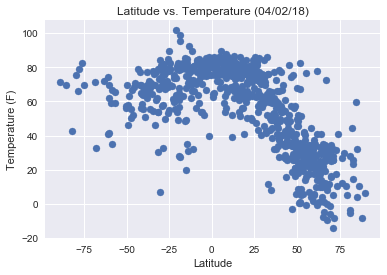

In [13]:
#Latitude Vs Temperature Scatter Plot details and saving the figure to png
plt.scatter(new_cities_df["Latitudes"],new_cities_df["Temperature"],marker ="o")
plt.title(("Latitude vs. Temperature (%s)" % time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
sns.set()
plt.savefig("Latitude_vs_Temperature.png")
plt.show()

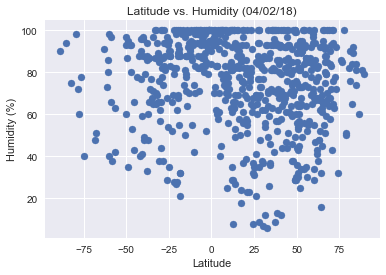

In [9]:
#Humidity Vs. Latitude Scatter Plot details and saving the figure to png
plt.scatter(new_cities_df["Latitudes"],new_cities_df["Humidity"],marker ="o")
plt.title(("Latitude vs. Humidity (%s)" % time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
sns.set()
plt.savefig("Latitude_vs_Humiditiy.png")
plt.show()

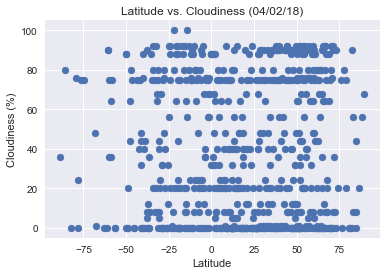

In [10]:
#Cloudiness Vs. Latitude Scatter Plot details and saving the figure to png
plt.scatter(new_cities_df["Latitudes"],new_cities_df["Cloudiness"],marker ="o")
plt.title(("Latitude vs. Cloudiness (%s)" % time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
sns.set()
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

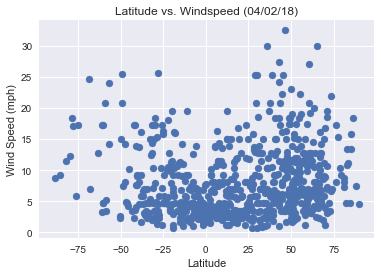

In [12]:
#Wind Speed Vs. Latitude Scatter Plot details and saving the figure to png
plt.scatter(new_cities_df["Latitudes"], new_cities_df["Wind Speed"],marker ="o")
plt.title(("Latitude vs. Windspeed (%s)" % time.strftime("%x")))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
sns.set()
plt.savefig("Latitude_vs_WindSpeed.png")
plt.show()